# PS2: Linear Models and Validation

**Your Name:** Gino Rospigliosi

**People I discussed this assignment with:** None

# Preamble
We'll be loading some CO2 concentration data that is a commonly used dataset for model building of time series prediction. You will build a few baseline linear models and assess them using some of the tools we discussed in class. Which model is best? Let's find out.

First let's just load the data and take a look at it:

In [586]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from datetime import datetime, timedelta
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_context('notebook')

# Fetch the data 
mauna_lao = fetch_openml('mauna-loa-atmospheric-co2')
print(mauna_lao.DESCR)
data = mauna_lao.data
# Assemble the day/time from the data columns so we can plot it
d1958 = datetime(year=1958,month=1,day=1)
time = [datetime(int(d[0]),int(d[1]),int(d[2])) for d in data] 
X = np.array([1958+(t-d1958)/timedelta(days=365.2425) for t in time]).T
X = X.reshape(-1,1)  # Make it a column to make scikit happy
y = np.array(mauna_lao.target)

**Weekly carbon-dioxide concentration averages derived from continuous air samples for the Mauna Loa Observatory, Hawaii, U.S.A.**<br><br>
These weekly averages are ultimately based on measurements of 4 air samples per hour taken atop intake lines on several towers during steady periods of CO2 concentration of not less than 6 hours per day; if no such periods are available on a given day, then no data are used for that day. The _Weight_ column gives the number of days used in each weekly average. _Flag_ codes are explained in the NDP writeup, available electronically from the [home page](http://cdiac.ess-dive.lbl.gov/ftp/trends/co2/sio-keel-flask/maunaloa_c.dat) of this data set. CO2 concentrations are in terms of the 1999 calibration scale (Keeling et al., 2002) available electronically from the references in the NDP writeup which can be accessed from the home page of this data set.
<br><br>
### Feature Descriptions
_co2_: average co2 concentration in ppvm <br>
_year_: year of concent

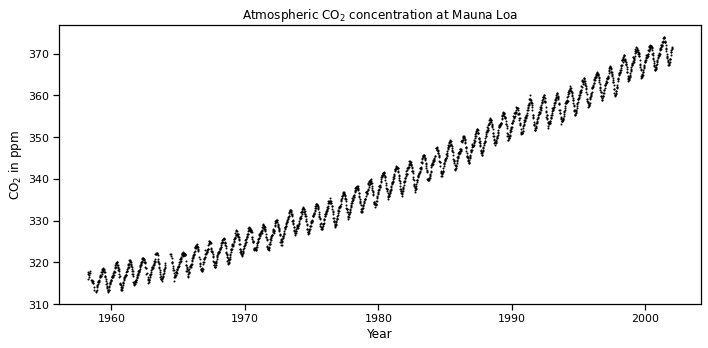

In [587]:
# Plot the data
plt.figure(figsize=(10,5))    # Initialize empty figure
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Linear Models

Construct the following linear models:
1. Model 1: "Vanilla" Linear Regression, that is, where $CO_2 = a+b \cdot time$
2. Model 2: Quadratic Regression, where $CO_2 = a+b \cdot t + c\cdot t^2$
3. Model 3: A more complex "linear" model with the following additive terms $CO_2=a+b\cdot t+c\cdot sin(\omega\cdot t)$:
  * a linear (in time) term
  * a sinusoidal additive term with period such that the peak-to-peak of the sinsusoid is roughly ~1 year and phase shift of zero (set $\omega$ as appropriate to match the peaks)
4. Model 4: A "linear" model with the following additive terms ($CO_2=a+b\cdot t+c\cdot t^2+d\cdot sin(\omega\cdot t)$:
  * a quadratic (in time) polynomial
  * a sinusoidal additive term with period such that the peak-to-peak of the sinsusoid is roughly ~1 year and phase shift of zero (set $\omega$ as appropriate to match the peaks)
  
Evauate these models using **the appropriate kind of Cross Validation** for each of the following amounts of Training data:
1. N=50 Training Data Points
2. N=100
3. N=200
4. N=500
5. N=1000
6. N=2000

**Question**: Before you even construct the models or do any coding below, what is your initial guess or intuition behind how each of those four models will perform? Note: there is no right or wrong answer to this part of the assignment and this question will only be graded on completeness, not accuracy. It's intent is to get you to think about and write down your preliminary intuition regarding what you think will happen before you actually implement anything, based on your approximate understanding of how functions of the above complexity *should* perform as N increases.

**Student Response:** I think that all models will perform well, however, I am sure certain models will peform better than others. Based on the plotting of the data, it appears to have an increasing linear and sinusoidal form osillation according to year. Therfore, I think that Model 1 will perform the best as N approaches infinity, while Model 4 will perform the best as N approaches 1, and Model 1 and 2 will perform well as N is in range [200 500].

**Question**: What is the appropriate kind of Cross Validation to perform in this case if we want a correct Out of Sample estimate of our Test MSE?

**Student Response:** The appropriate kind of test is Time Series Split since the data is time dependent and it provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate. This prevents look-ahead bias which when the validation uses data that is not available/known in the analysis period, leading to inaccurate results.

Now, for each of the above models and training data sizes:
* Plot the predicted CO2 as a function of time, including the actual data, for each of the N=X training data examples. This should correspond to six plots (one for each amount of training data) if you plot all models on the same plot, or 6x4 = 24 plots if you plot each model and training data plot separately.
* Create a [Learning Curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) plot for the model which plots its Training and Test MSE as a function of training data. That is, plot how Training and Testing MSE change as you increase the training data for each model. This could be a single plot for all four models (8 lines on the plot) or four different plots corresponding to the learning curve of each model separately.

[[-2.31954416e+03  1.34291742e+00]]


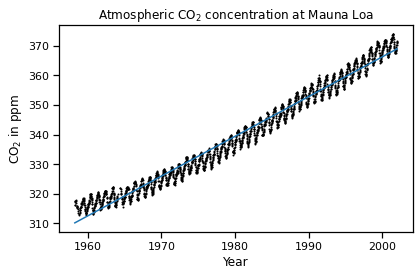

In [588]:
# Model 1: 
#Using Normal Equation to find parameters/weights
#𝐶𝑂2=𝑎+𝑏⋅𝑡𝑖𝑚𝑒
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX = np.c_[ones, X]
matrixY = np.matrix(y).T
W = np.linalg.inv(matrixX.T.dot(matrixX)).dot(matrixX.T).dot(matrixY)
W = W.flatten()
W = np.array(W)
print(W)
#a=-2.320e3 #b=1.343
Fit1 = W[0,0]+W[0,1]*X
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.plot(X, Fit1) #Model Data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

In [589]:
#Model 1:
#Using Gradient Descent
#def loss(w):
#    N = len(y)
#    return np.sum(np.square(y-w*X))/N

#wp = np.linspace(0,80,1000)
#cost = [loss(w) for w in wp]
#plt.figure(figsize=(10,5))
#plt.plot(wp,cost)
#plt.ylabel('Cost')
#plt.xlabel('slope (w)')
#plt.show()

#def dloss(w,X):
#    N = len(y)
#    return -2*np.sum(np.multiply(y-w*X,X))/N

#grad = [dloss(w,X) for w in wp]
#plt.plot(wp,grad)
#plt.ylabel('Gradient')
#plt.xlabel('slope (w)')
#plt.show()

#def grad_step(w, X, alpha):
#    return w - alpha*dloss(w,X)

#g = 50  # Start at 50
#wg = grad_step(wg, X, 0.001)  # Take a small step
#print(wg)  # Now we are at...

#Using Stochastic Gradient Descent

#def sgd_dloss(w,y,x):
#    return -2*(y-w*x)*x

#wg = 80 # Initial guess at slope
#alpha = 0.02  # Step Size
#num_passes = 20  # Number of times we pass through the data
#shuffle_after_pass = True  # Whether to shuffle the data

#N = len(y)
#weights = np.zeros(N*num_passes+1)
#k=0
#weights[k] = wg  # Set the initial weight
#print('Initial weight: ',weights[0])

#index = list(range(N))
#for n in range(num_passes):
#    if shuffle_after_pass:
#        np.random.shuffle(index)
#    for i in index:
#        k+=1
#        xi = X[i,0]
#       yi = y[i]
#        weights[k] = weights[k-1] - alpha*sgd_dloss(weights[k-1],yi,xi)

[[ 4.34832648e+04 -4.49158497e+01  1.16793513e-02]]


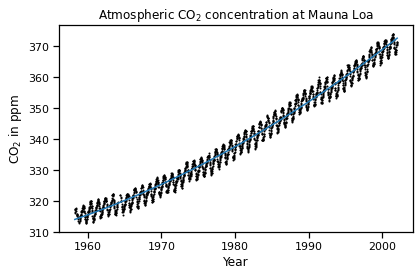

In [590]:
#Model 2:
#Using Normal Equation to find parameters/weights
#𝐶𝑂2=𝑎+𝑏⋅𝑡+𝑐⋅𝑡2
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX = np.c_[ones, X, matrixX_sq]
matrixY = np.matrix(y).T
W = np.linalg.inv(matrixX.T.dot(matrixX)).dot(matrixX.T).dot(matrixY)
W = W.flatten()
W = np.array(W)
print(W)
#a=4.348e4 #b=-4.492e1 #c=1.168e-2
Fit2 = W[0,0]+W[0,1]*X+W[0,2]*X*X
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.plot(X, Fit2) #Model Data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

[[-2.31916360e+03  1.34272451e+00  7.97319489e-02]]


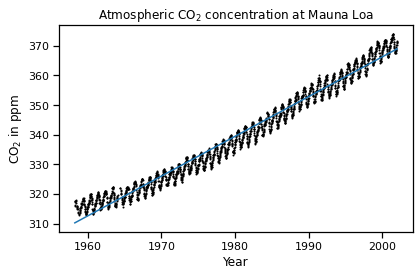

In [591]:
#Model 3:
#Using Normal Equation to find parameters/weights
#𝐶𝑂2=𝑎+𝑏⋅𝑡+𝑐⋅𝑠𝑖𝑛(𝜔⋅𝑡)
w=2*3.14*1/365
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
matrixX = np.c_[ones, X, matrixX_sine]
matrixY = np.matrix(y).T
W = np.linalg.inv(matrixX.T.dot(matrixX)).dot(matrixX.T).dot(matrixY)
W= W.flatten()
W= np.array(W)
print(W)
#a=-2.319e3 #b=1.343e1 #c=7.973e-2
Fit3 = W[0,0]+W[0,1]*X+W[0,2]*np.sin(w*X)
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.plot(X, Fit3) #Model Data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

[[ 4.34706381e+04 -4.49030204e+01  1.16760926e-02  3.20600285e-02]]


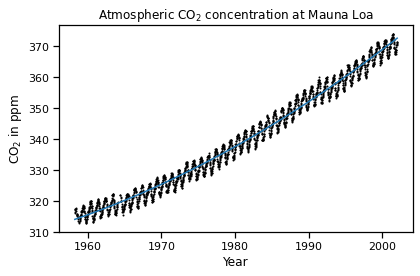

In [592]:
#Model 4:
#Using Normal Equation to find parameters/weights
#𝐶𝑂2=𝑎+𝑏⋅𝑡+𝑐⋅𝑡2+𝑑⋅𝑠𝑖𝑛(𝜔⋅𝑡)
w=2*3.14*1/365
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
matrixX = np.c_[ones, X, matrixX_sq, matrixX_sine]
matrixY = np.matrix(y).T
W = np.linalg.inv(matrixX.T.dot(matrixX)).dot(matrixX.T).dot(matrixY)
W= W.flatten()
W= np.array(W)
print(W)
#a=4.348e4 #b=-4.492e1 #c=1.168e-2 d=3.206e-2
Fit4 = W[0,0]+W[0,1]*X+W[0,2]*X*X+W[0,3]*np.sin(w*X)
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.plot(X, Fit4) #Model Data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

MSE:
7.6096617307725785


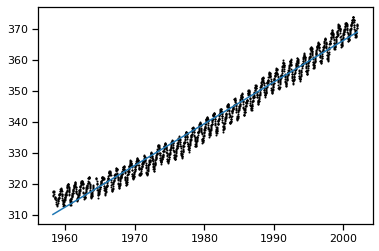

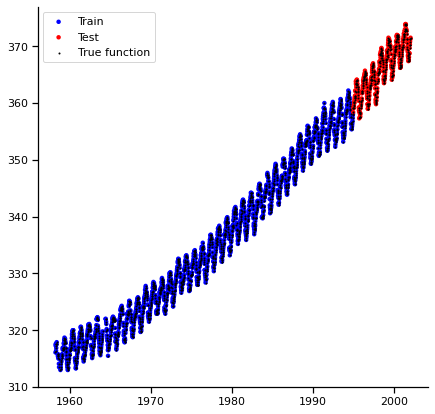

In [593]:
#Cross Validation N=50 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
Xfeatures= np.c_[ones, X]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
#The training set has size i * n_samples // (n_splits + 1) + n_samples % (n_splits + 1)
for i in range (1, 50):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=50)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

#Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.609661730772582


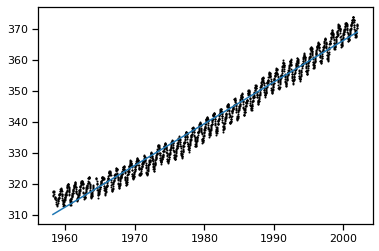

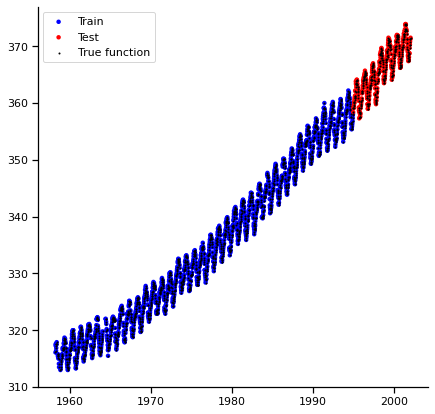

In [594]:
#Cross Validation N=100 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
Xfeatures= np.c_[ones, X]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 100):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=100)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

#Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865476


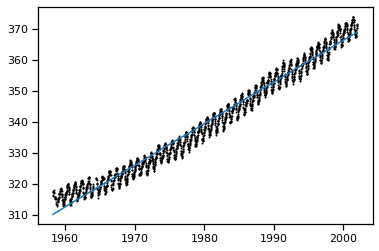

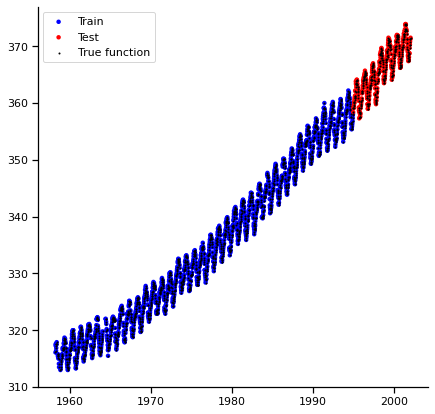

In [595]:
#Cross Validation N=200 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 200):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=200)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.609661730772582


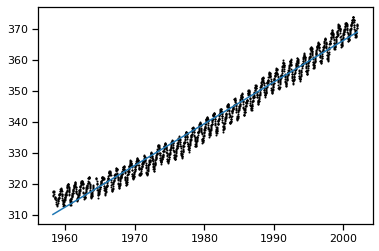

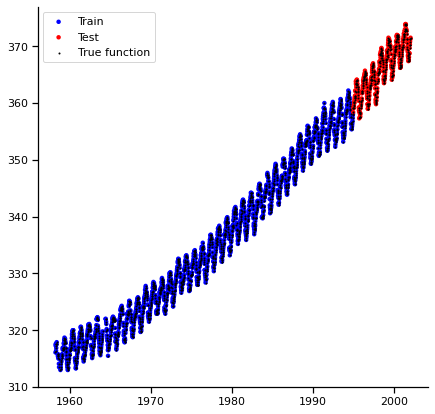

In [596]:
#Cross Validation N=500 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
Xfeatures= np.c_[ones, X]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 500):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=500)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


#Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.609661730772582


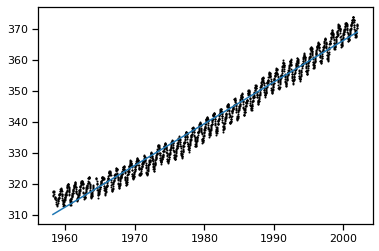

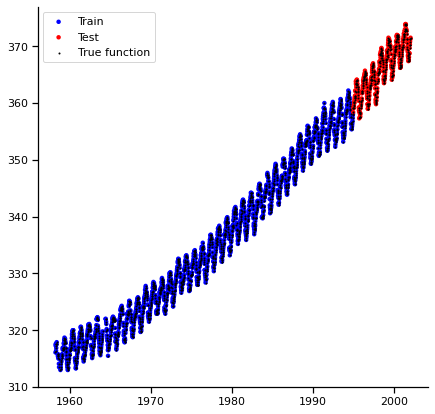

In [597]:
#Cross Validation N=1000 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
Xfeatures= np.c_[ones, X]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 1000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=1000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


#Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.609661730772582


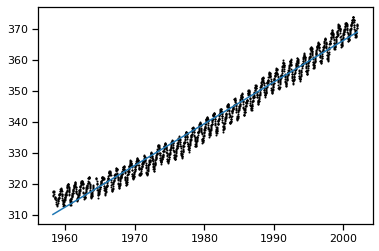

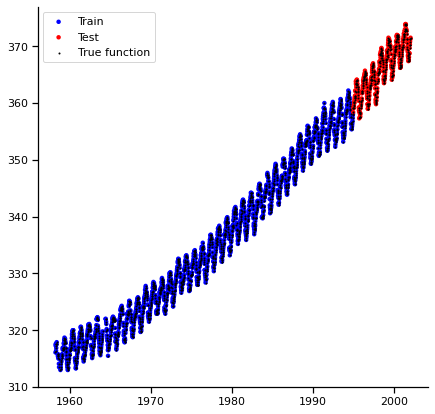

In [598]:
#Cross Validation N=2000 Model 1:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
Xfeatures= np.c_[ones, X]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 2000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=2000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


#Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888527354136076


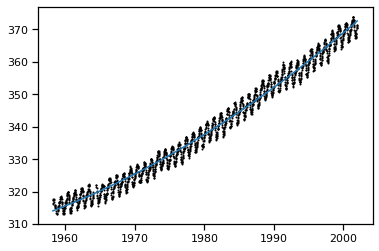

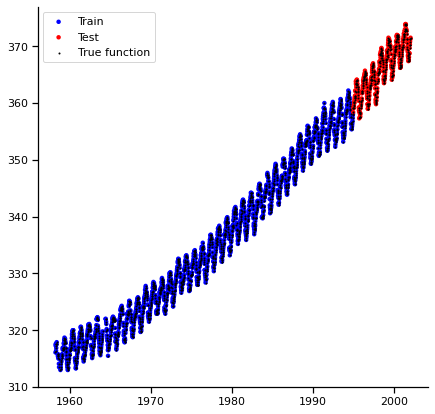

In [599]:
#Cross Validation N=50 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 50):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=50)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888527354136076


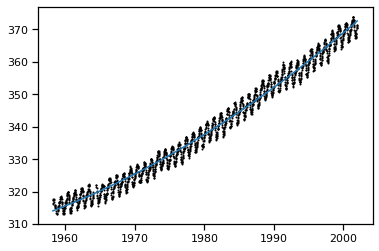

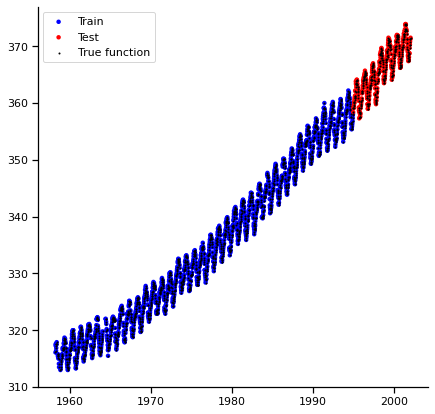

In [600]:
#Cross Validation N=100 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 100):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=100)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888527354136076


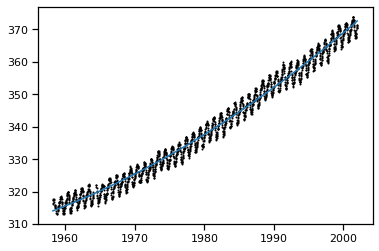

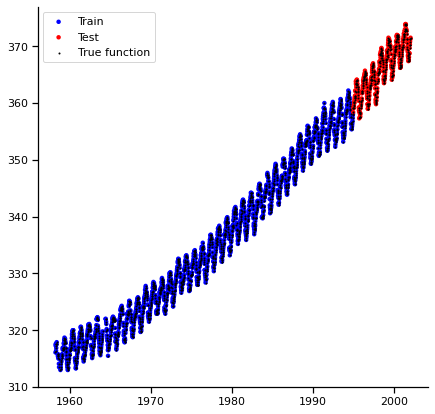

In [601]:
#Cross Validation N=200 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 200):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=200)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888527354136076
TimeSeriesSplit(max_train_size=None, n_splits=5)


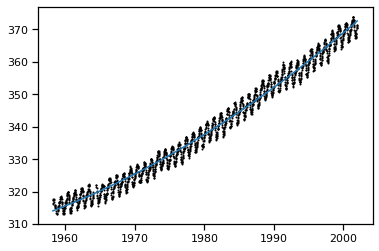

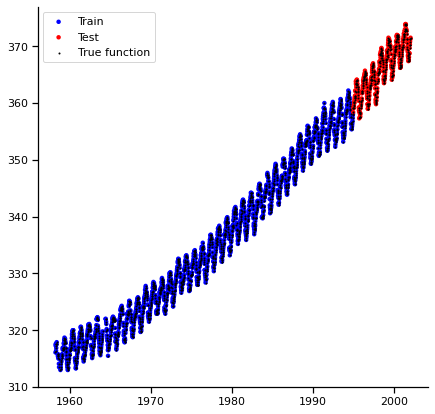

In [602]:
#Cross Validation N=500 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 500):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=500)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

In [ ]:
#Cross Validation N=1000 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 1000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=1000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888527354135737


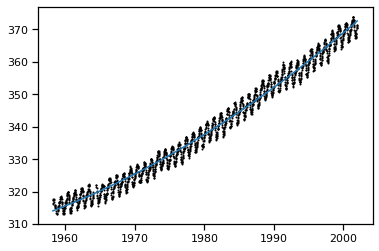

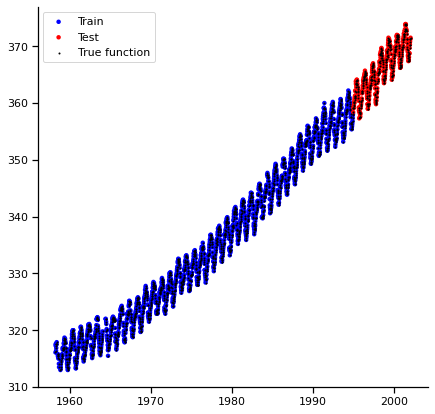

In [604]:
#Cross Validation N=2000 Model 2:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
Xfeatures= np.c_[ones, X, matrixX_sq]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 2000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=2000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865474


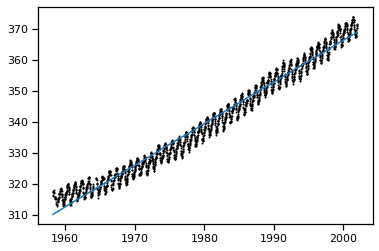

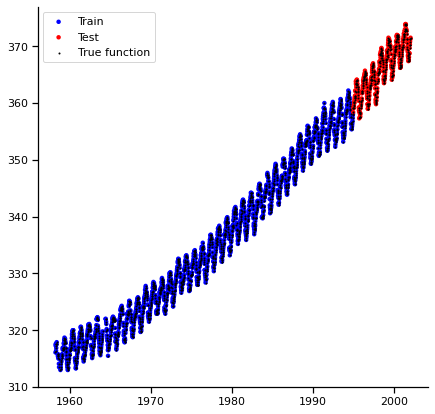

In [605]:
#Cross Validation N=50 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 50):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=50)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865476


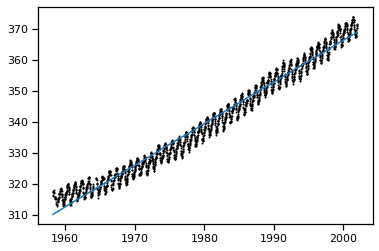

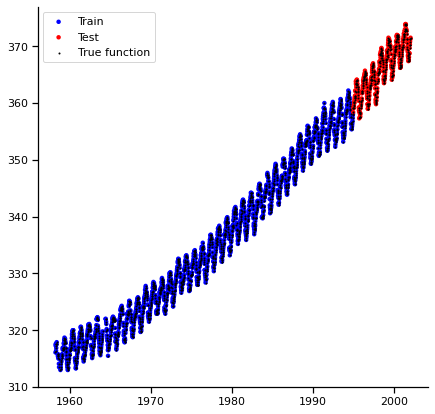

In [606]:
#Cross Validation N=100 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 100):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=100)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.60650663286548


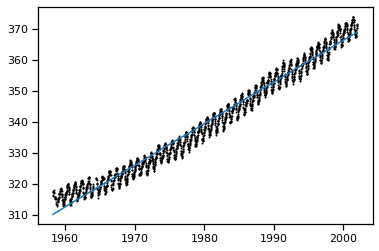

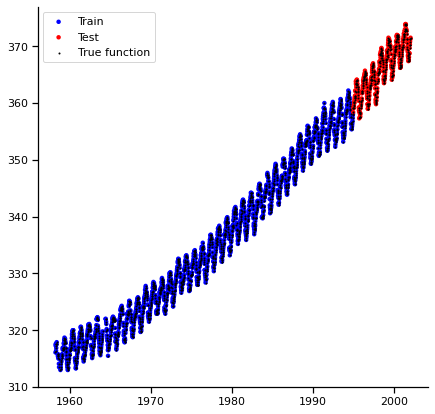

In [607]:
#Cross Validation N=200 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 200):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=200)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865474


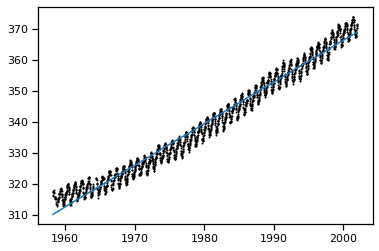

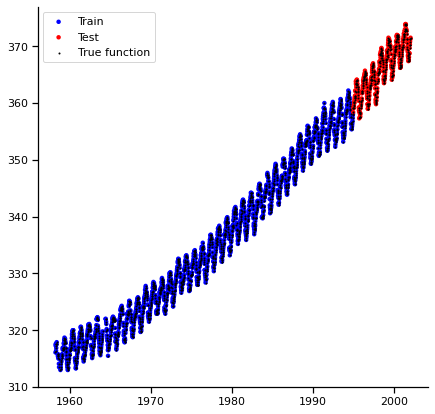

In [608]:
#Cross Validation N=500 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 500):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=500)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865476


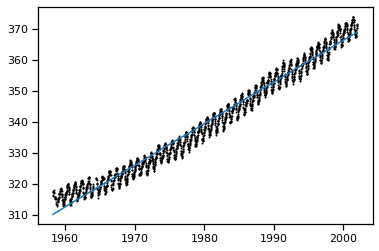

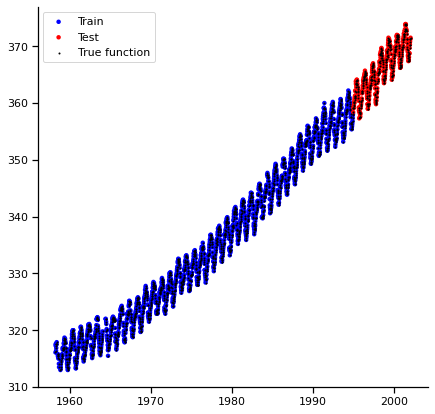

In [609]:
#Cross Validation N=1000 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 1000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=1000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
7.606506632865476


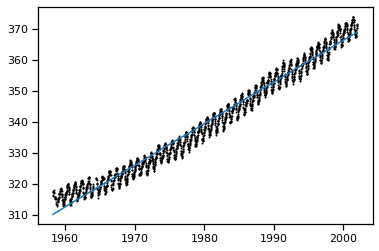

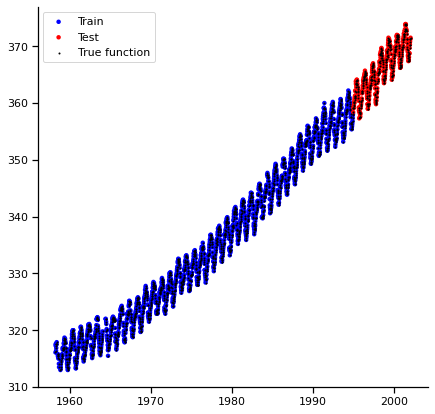

In [610]:
#Cross Validation N=2000 Model 3:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 2000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=2000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

MSE:
4.888017441954439


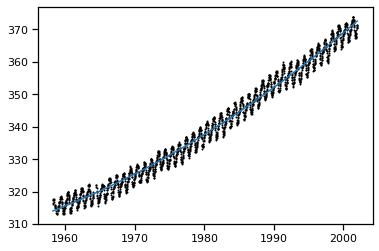

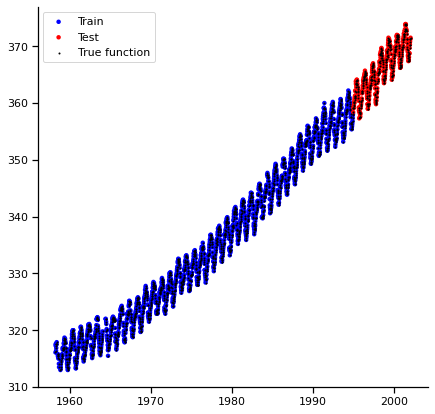

In [611]:
#Cross Validation N=50 Model 4:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 50):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=50)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


MSE:
4.888017441954439


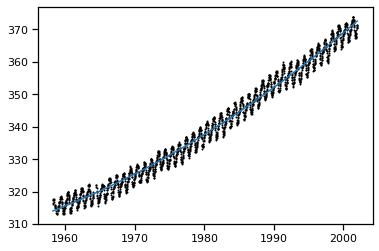

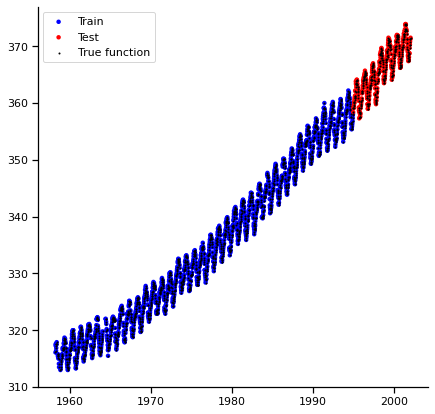

In [613]:
#Cross Validation N=100 Model 4:

#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 100):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=100)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


MSE:
4.8880174419543545


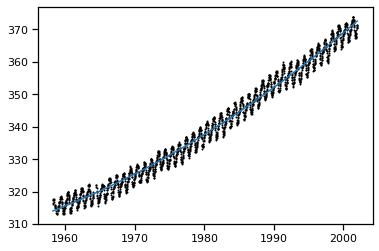

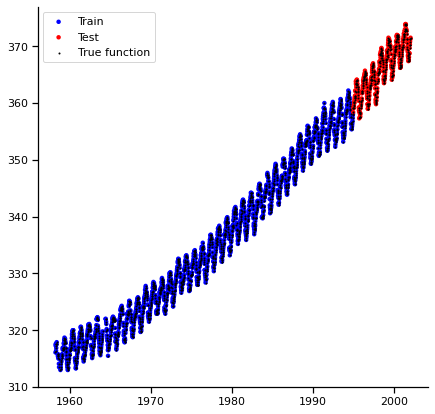

In [615]:
#Cross Validation N=200 Model 4:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 200):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=200)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


MSE:
4.8880174419543545


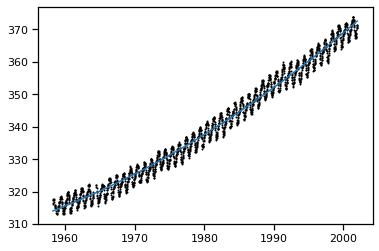

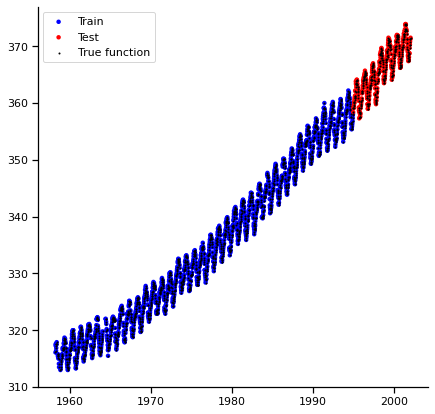

In [616]:
#Cross Validation N=500 Model 4:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 500):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=500)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


MSE:
4.888017441954439


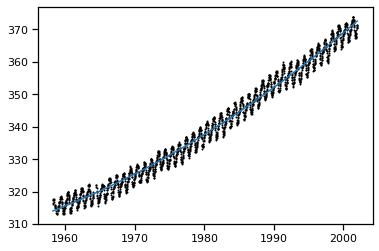

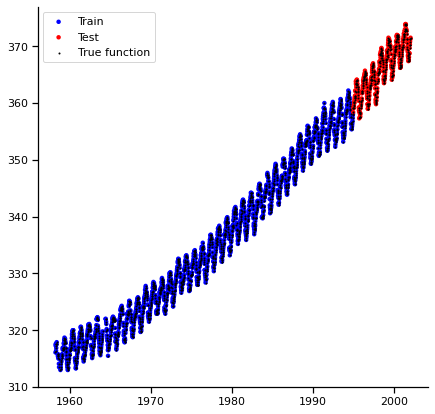

In [617]:
#Cross Validation N=1000 Model 4:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 1000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=1000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


MSE:
4.888017441954439


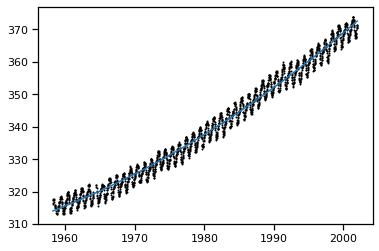

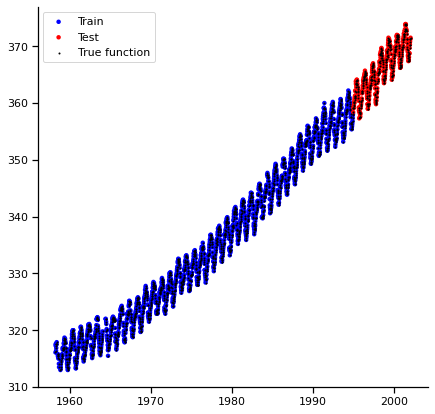

In [618]:
#Cross Validation N=2000 Model 4:
#Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
ones = np.ones(len(X))
onesmatrix = np.matrix(ones)
matrixX = np.matrix(X)
matrixX_sq = np.matrix(np.square(X))
matrixX_sine = np.matrix(np.sin(X))
Xfeatures= np.c_[ones, X, matrixX_sq, matrixX_sine]
n_samples = 50
noise_amount = 0.1
XSamples = np.sort(np.random.rand(n_samples))
YSamples = Fit1 + np.random.randn(n_samples) * noise_amount
linear_regression = LinearRegression()
linear_regression.fit(Xfeatures, y)
y_pred = linear_regression.predict(Xfeatures)
print("MSE:")
print(mean_squared_error(y, y_pred))
plt.plot(X, y_pred)
plt.scatter(X, y, c='k',s=1)

#Time series split
for i in range (1, 2000):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit()
    TimeSeriesSplit(max_train_size=None, n_splits=2000)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

# Plot the data samples
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')
plt.scatter(X, y, c='k',s=1,label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()


**Question**: Which Model appears to perform best in the N=50 or N=100 Condition? Why is this?

**Student Response:** Model 4 appears to peform the best since N is low and function complexity has 4 parameters

**Question**: Which Model appears to perform best as the N=200 to 500? Why is this?

**Student Response:** Model 2 appears to perfom the best since this is mild complexity and mild N not totally with 3 parameters

**Question**: Which Model appears to perform best as N = 2000? Why is this?

**Student Response:** Model 1 appears to perform the best since linearity increases as N increases and the function has 2 parameters